# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [6]:
sample = pd.read_csv('PS_20174392719_1491204439457_log.csv').sample(100000)
display(sample.shape)
display(sample.dtypes)
display(sample.head())

(100000, 11)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4305985,307,CASH_IN,349385.09,C938882464,8517778.95,8867164.05,C1757507867,746940.45,397555.35,0,0
36490,9,TRANSFER,659282.61,C544874716,0.00,0.00,C1818375095,701056.21,1802046.35,0,0
243795,14,CASH_OUT,140648.01,C1041759502,0.00,0.00,C1219241264,721529.35,772716.02,0,0
4014379,299,PAYMENT,1972.60,C909474125,0.00,0.00,M62447070,0.00,0.00,0,0
4322168,308,CASH_OUT,85469.89,C1752810735,0.00,0.00,C1016493698,353590.79,439060.69,0,0


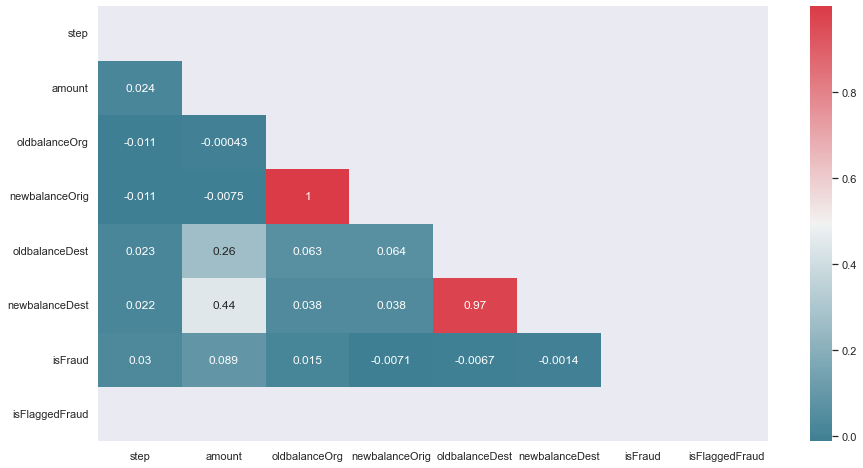

In [9]:
sample_heat = sample[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

corr = sample_heat.corr()
sns.set(rc = {'figure.figsize':(15,8)})
matrix = np.triu(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cbar=True, annot=True, mask=matrix, cmap=cmap)
plt.show()

### What is the distribution of the outcome? 

In [10]:
sample['isFraud'].value_counts()

0    99866
1      134
Name: isFraud, dtype: int64

There are 99866 cases of non-fraud and only 134 cases of fraud, so this an extremely imbalanced dataset

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
#droping the nameOrig column
sample = sample.drop(['nameOrig'], axis = 1)
sample.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4305985,307,CASH_IN,349385.09,8517778.95,8867164.05,C1757507867,746940.45,397555.35,0,0
36490,9,TRANSFER,659282.61,0.00,0.00,C1818375095,701056.21,1802046.35,0,0
243795,14,CASH_OUT,140648.01,0.00,0.00,C1219241264,721529.35,772716.02,0,0
4014379,299,PAYMENT,1972.60,0.00,0.00,M62447070,0.00,0.00,0,0
4322168,308,CASH_OUT,85469.89,0.00,0.00,C1016493698,353590.79,439060.69,0,0


In [17]:
#droping the nameDest column
sample = sample.drop(['nameDest'], axis = 1)
sample.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4305985,307,CASH_IN,349385.09,8517778.95,8867164.05,746940.45,397555.35,0
36490,9,TRANSFER,659282.61,0.00,0.00,701056.21,1802046.35,0
243795,14,CASH_OUT,140648.01,0.00,0.00,721529.35,772716.02,0
4014379,299,PAYMENT,1972.60,0.00,0.00,0.00,0.00,0
4322168,308,CASH_OUT,85469.89,0.00,0.00,353590.79,439060.69,0


In [15]:
sample['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

In [18]:
#droping the 'isFlaggedFraud' column
sample = sample.drop(['isFlaggedFraud'], axis = 1)
sample.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4305985,307,CASH_IN,349385.09,8517778.95,8867164.05,746940.45,397555.35,0
36490,9,TRANSFER,659282.61,0.00,0.00,701056.21,1802046.35,0
243795,14,CASH_OUT,140648.01,0.00,0.00,721529.35,772716.02,0
4014379,299,PAYMENT,1972.60,0.00,0.00,0.00,0.00,0
4322168,308,CASH_OUT,85469.89,0.00,0.00,353590.79,439060.69,0


In [28]:
#one hot encoding of type

#sample.columns = sample.columns.str.replace(' ', '')
#sample = sample['type'].astype(str)
sample = pd.get_dummies(sample, columns = ['type'])
sample = sample.drop(columns=['type'], axis = 1)
sample.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4305985,307,349385.09,8517778.95,8867164.05,746940.45,397555.35,0,1,0,0,0,0
36490,9,659282.61,0.00,0.00,701056.21,1802046.35,0,0,0,0,0,1
243795,14,140648.01,0.00,0.00,721529.35,772716.02,0,0,1,0,0,0
4014379,299,1972.60,0.00,0.00,0.00,0.00,0,0,0,0,1,0
4322168,308,85469.89,0.00,0.00,353590.79,439060.69,0,0,1,0,0,0


In [11]:
sample['step'].value_counts()


19     822
187    778
307    771
235    750
18     745
      ... 
268      1
110      1
365      1
558      1
317      1
Name: step, Length: 481, dtype: int64

In [ ]:
#I'll leave step as it is.

### Run a logisitc regression classifier and evaluate its accuracy.

In [47]:
X = sample.drop(labels='isFraud', axis=1)
y = sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)



In [48]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.998

In [49]:
LR.score(X_train,y_train)

0.9980125

In [50]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     19973
           1       0.00      0.04      0.00        27

    accuracy                           0.95     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       1.00      0.95      0.97     20000

[[19014   959]
 [   26     1]]


In [51]:
sm = SMOTE(random_state=1, sampling_strategy = 1.0) 

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [52]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)

pred = LR.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     19973
           1       0.03      0.93      0.05        27

    accuracy                           0.95     20000
   macro avg       0.51      0.94      0.51     20000
weighted avg       1.00      0.95      0.97     20000

[[19044   929]
 [    2    25]]


In [53]:
LR.score(X_train,y_train)

0.9545

### Now pick a model of your choice and evaluate its accuracy.

Since this is an imbalanced data set I'll try a decision tree

In [67]:
tree_sample = DecisionTreeClassifier(max_depth = 5) 


tree_sample.fit(X_train, y_train)

print("test data accuracy was: ", model.score(X_test, y_test))
print("train data accuracy was: ", model.score(X_train, y_train))



test data accuracy was:  0.9996
train data accuracy was:  0.9996875


In [68]:
pred = tree_sample.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.91      0.74      0.82        27

    accuracy                           1.00     20000
   macro avg       0.95      0.87      0.91     20000
weighted avg       1.00      1.00      1.00     20000

[[19971     2]
 [    7    20]]


In [64]:
tree_smote = DecisionTreeClassifier(max_depth=3).fit(X_train_SMOTE, y_train_SMOTE)

pred = tree_smote.predict(X_test)

print(tree_smote.score(X_train_SMOTE, y_train_SMOTE))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9605534902932672
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19973
           1       0.03      0.89      0.07        27

    accuracy                           0.97     20000
   macro avg       0.52      0.93      0.52     20000
weighted avg       1.00      0.97      0.98     20000

[[19299   674]
 [    3    24]]


### Which model worked better and how do you know?

The model that worked best is the logistic regression with smote because it's the highest recall score.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.